In [2]:
from LCSPS import LCSPS

In [3]:
%load_ext autoreload
%autoreload 2

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


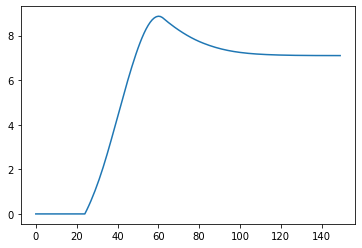

In [4]:
import pickle
import numpy as np
from matplotlib import pyplot as plt 
import sys 

sys.path.append('/Users/thinhhoang/Documents/anomaly-detection-ngsim/lanechange')

pfile = pickle.load(open( "lane.pyo", "rb" ))
tvec = pfile['t_vec'][0]
xvec = pfile['x_vec']

fpca_discretized = pickle.load(open('fpca.pyo', 'rb'))
basis = fpca_discretized.components_.data_matrix.reshape((-1,fpca_discretized.components_.data_matrix.shape[1])).transpose()
basis = basis[:,:2]
mean = fpca_discretized.mean_.data_matrix.reshape((-1,1))

lcdts = pickle.load(open('lcsp.pyo','rb'))

sample_traj = np.zeros_like(mean)
sample_traj[:24] = (lcdts[0].reshape((-1,1)) - mean)[0]
sample_traj[24:] = (lcdts[0].reshape((-1,1)) - mean)[:-24]
# sample_traj = xvec[16,:]
plt.plot(sample_traj)
plt.show()

In [5]:
sample_basis = np.zeros((5,2))
sample_basis[:,0] = np.arange(5)
sample_basis[:,1] = np.arange(5) + 1
sample_basis

array([[0., 1.],
       [1., 2.],
       [2., 3.],
       [3., 4.],
       [4., 5.]])

In [19]:
lcs = LCSPS(
    np.array([[0],[0]]),
    np.array([[30,0],[0,15]]),
    1e-2,
    mean,
    basis
)

Initialization of LCSPS completed


In [20]:
for i in range(120):
    lcs.add_datum(sample_traj[i])
print('Completed adding datums into the LCS')

Completed adding datums into the LCS


In [21]:
pij = lcs.marginalize_repr_all_subseqs()
ck = lcs.get_change_point(pij)

In [22]:
ck

array([ -1.,  24., 118.])